<a href="https://colab.research.google.com/github/peterX96/Archive/blob/main/03-linear-classification/Classification_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 (2 points + 1 bonus point + 1 super-bonus point)

(Titanic data again)

Build a model with `sklearn`'s `LogisticRegression` to get the accuracy of at least 0.80 (0.82 for the bonus point, 0.85 for the super-bonus point) on the test set.

Some (optional) suggestions:
- Add new features (e.g. missing value indicator columns)
- Fill missing values
- Encode categorical features (e.g. one-hot encoding)
- Scale the features (e.g. with standard or robust scaler)
- Think of other ways of preprocessing the features (e.g. `Fare` $\to$ `log(Fare)`)
- Try adding polynomial features



In [1]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2023-09-29 20:17:35--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.002s  

2023-09-29 20:17:35 (25.4 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [24]:
import seaborn as sns
import numpy as np

In [32]:
data.Embarked = data.Embarked.replace(['C', 'Q', 'S'], [1,2,3])
data.Sex = data.Sex.replace(['male', 'female'], [1,2])

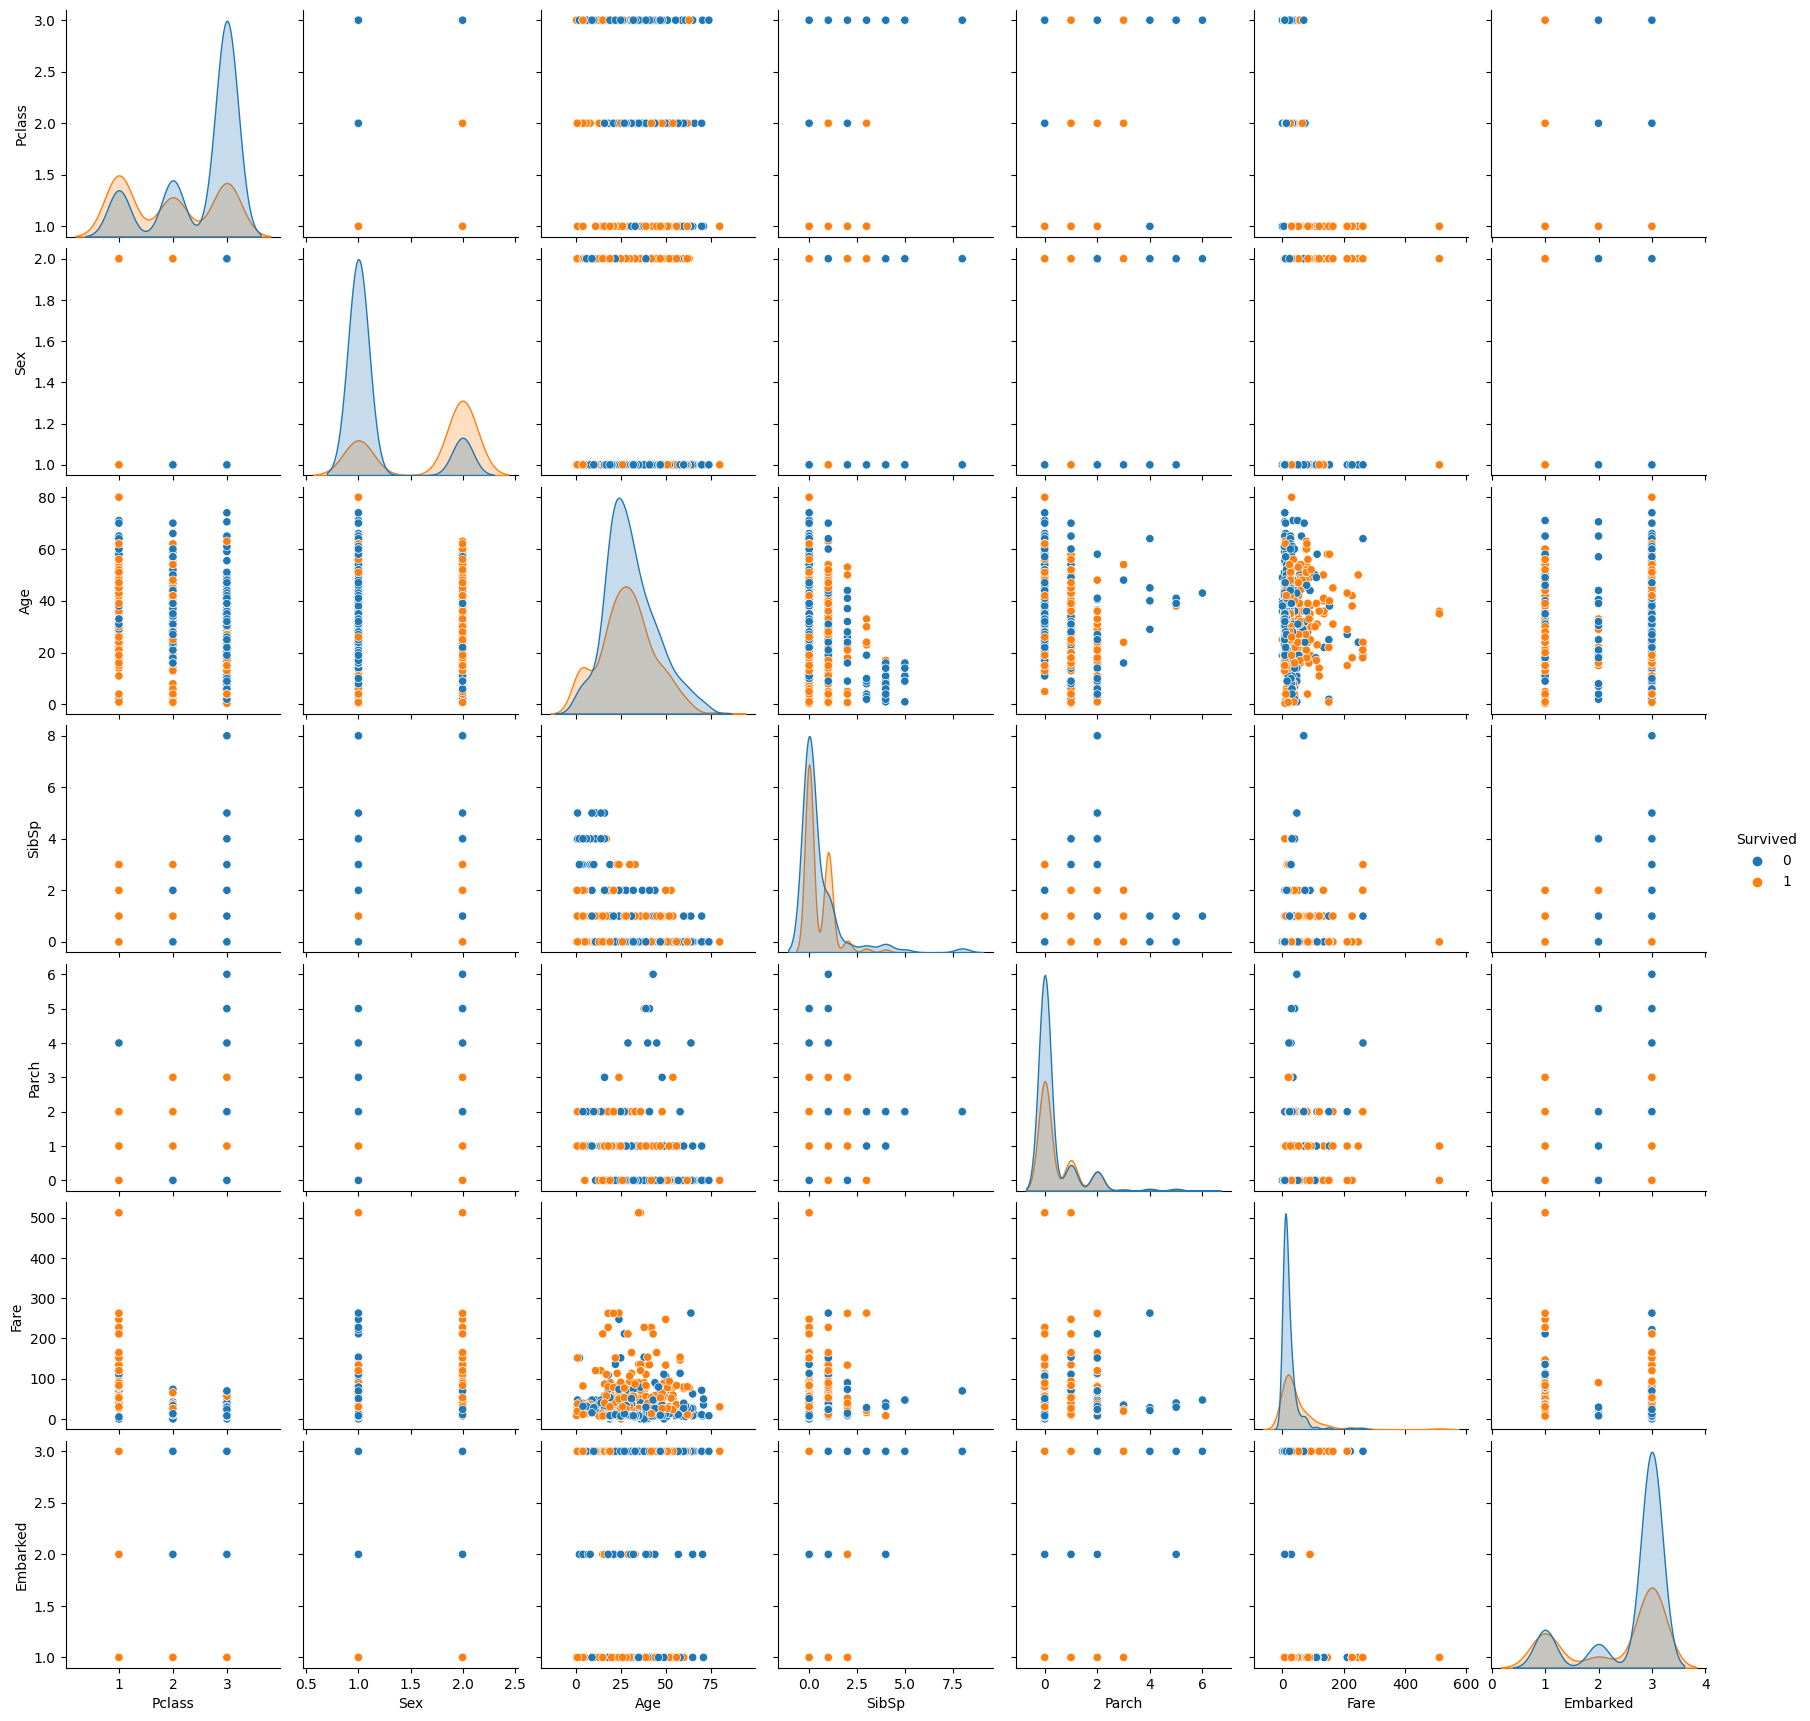

In [22]:
sns.pairplot(data, hue = 'Survived')

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def feature_selection_and_preprocessing(dataset):
    # <YOUR CODE>
    # E.g.:
    np.random.seed(0)
    features = dataset[["Age", "Fare", "Sex", "Pclass", "SibSp"]].copy()
    features["Age"] = dataset.Age.fillna(dataset.Age.median() + np.random.normal(dataset.Age.median(), dataset.Age.std()))
    features["Age"] -= features["Age"].median()
    features["Fare"] = dataset.Fare.fillna(dataset.Fare.median() + np.random.normal(dataset.Fare.median(), dataset.Fare.std()))
    features["Fare"] -= features["Fare"].median()
    features["Sex"] = features["Sex"].replace(['male', 'female'], [1,2])
    sex_unique = np.unique(features.Sex)
    features["Sex"] = features.Sex.fillna(np.random.choice(sex_unique))#, p = [len(dataset.Sex[dataset.Sex == sex_unique[0]])/len(dataset.Sex), len(dataset.Sex[dataset.Sex == sex_unique[1]])/len(dataset.Sex)]))
    class_unique = np.unique(features.Pclass)
    features["Pclass"] = dataset.Pclass.fillna(np.random.choice(class_unique))#, p = [len(dataset.Pclass[dataset.Pclass == class_unique[0]])/len(dataset.Pclass), len(dataset.Pclass[dataset.Pclass == class_unique[1]])/len(dataset.Sex), len(dataset.Pclass[dataset.Pclass == class_unique[2]])/len(dataset.Sex)]))
    features = pd.concat([features, ((features.Age**3)*features.Sex).rename('new_feature_1'), ((features.Fare)*features.Pclass).rename('new_feature_2')], axis = 1)#, names = ['Age', 'Fare', 'Sex', 'Pclass', 'Agesquared', 'Age*Fare'])
    return features

model = make_pipeline(StandardScaler(), PolynomialFeatures(interaction_only = False), LogisticRegression(solver = 'newton-cg'))

# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

train_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    )
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)

print("Train accuracy:", accuracy_score(
    data_train['Survived'],
    train_predictions
))
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Train accuracy: 0.8393632416787264
Test accuracy: 0.86


Чисто формально, в задании просили accuracy > 0.85 на ТЕСТОВОЙ выборке, что и представлено. Но да, на тренировочной 0.84.

Походило ли решение этой задачи на попытку шимпанзе напечатать "Войну и Мир"? Безусловно. Но я честно старался подойти к ней осмысленно, посмотрев на pairplot.